In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [2]:
data=pd.read_csv(r"C:\Users\omkar\OneDrive\Desktop\DJS_NSDC\cardio_train.csv")
data.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [3]:
data.shape

(70000, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
data['gender'].value_counts()

gender
1    45530
2    24470
Name: count, dtype: int64

In [6]:
data['cholesterol'].value_counts()

cholesterol
1    52385
2     9549
3     8066
Name: count, dtype: int64

In [7]:
data_encoded=pd.get_dummies(data,columns=['gender','cholesterol','gluc'],drop_first=True,dtype=int)
data_encoded

,id,age,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,gender_2,cholesterol_2,cholesterol_3,gluc_2,gluc_3
0,0,18393,168,62.0,110,80,0,0,1,0,1,0,0,0,0
1,1,20228,156,85.0,140,90,0,0,1,1,0,0,1,0,0
2,2,18857,165,64.0,130,70,0,0,0,1,0,0,1,0,0
3,3,17623,169,82.0,150,100,0,0,1,1,1,0,0,0,0
4,4,17474,156,56.0,100,60,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,168,76.0,120,80,1,0,1,0,1,0,0,0,0
69996,99995,22601,158,126.0,140,90,0,0,1,1,0,1,0,1,0
69997,99996,19066,183,105.0,180,90,0,1,0,1,1,0,1,0,0
69998,99998,22431,163,72.0,135,80,0,0,0,1,0,0,0,1,0


In [8]:
age_min,age_max=data_encoded['age'].min(),data_encoded['age'].max()
data_encoded['age'] = ((data_encoded['age'] - age_min) / (age_max - age_min)) * 100
data_encoded['age']=data_encoded['age'].astype(int)
data_encoded

,id,age,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,gender_2,cholesterol_2,cholesterol_3,gluc_2,gluc_3
0,0,58,168,62.0,110,80,0,0,1,0,1,0,0,0,0
1,1,73,156,85.0,140,90,0,0,1,1,0,0,1,0,0
2,2,62,165,64.0,130,70,0,0,0,1,0,0,1,0,0
3,3,52,169,82.0,150,100,0,0,1,1,1,0,0,0,0
4,4,51,156,56.0,100,60,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,65,168,76.0,120,80,1,0,1,0,1,0,0,0,0
69996,99995,91,158,126.0,140,90,0,0,1,1,0,1,0,1,0
69997,99996,64,183,105.0,180,90,0,1,0,1,1,0,1,0,0
69998,99998,90,163,72.0,135,80,0,0,0,1,0,0,0,1,0


In [9]:
data_encoded.drop(['id'],axis=1,inplace=True)

In [10]:
data_encoded

,age,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,gender_2,cholesterol_2,cholesterol_3,gluc_2,gluc_3
0,58,168,62.0,110,80,0,0,1,0,1,0,0,0,0
1,73,156,85.0,140,90,0,0,1,1,0,0,1,0,0
2,62,165,64.0,130,70,0,0,0,1,0,0,1,0,0
3,52,169,82.0,150,100,0,0,1,1,1,0,0,0,0
4,51,156,56.0,100,60,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,65,168,76.0,120,80,1,0,1,0,1,0,0,0,0
69996,91,158,126.0,140,90,0,0,1,1,0,1,0,1,0
69997,64,183,105.0,180,90,0,1,0,1,1,0,1,0,0
69998,90,163,72.0,135,80,0,0,0,1,0,0,0,1,0


C:\Users\omkar\AppData\Local\Temp\ipykernel_21404\3592235724.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_encoded['weight'])


<Axes: xlabel='weight', ylabel='Density'>

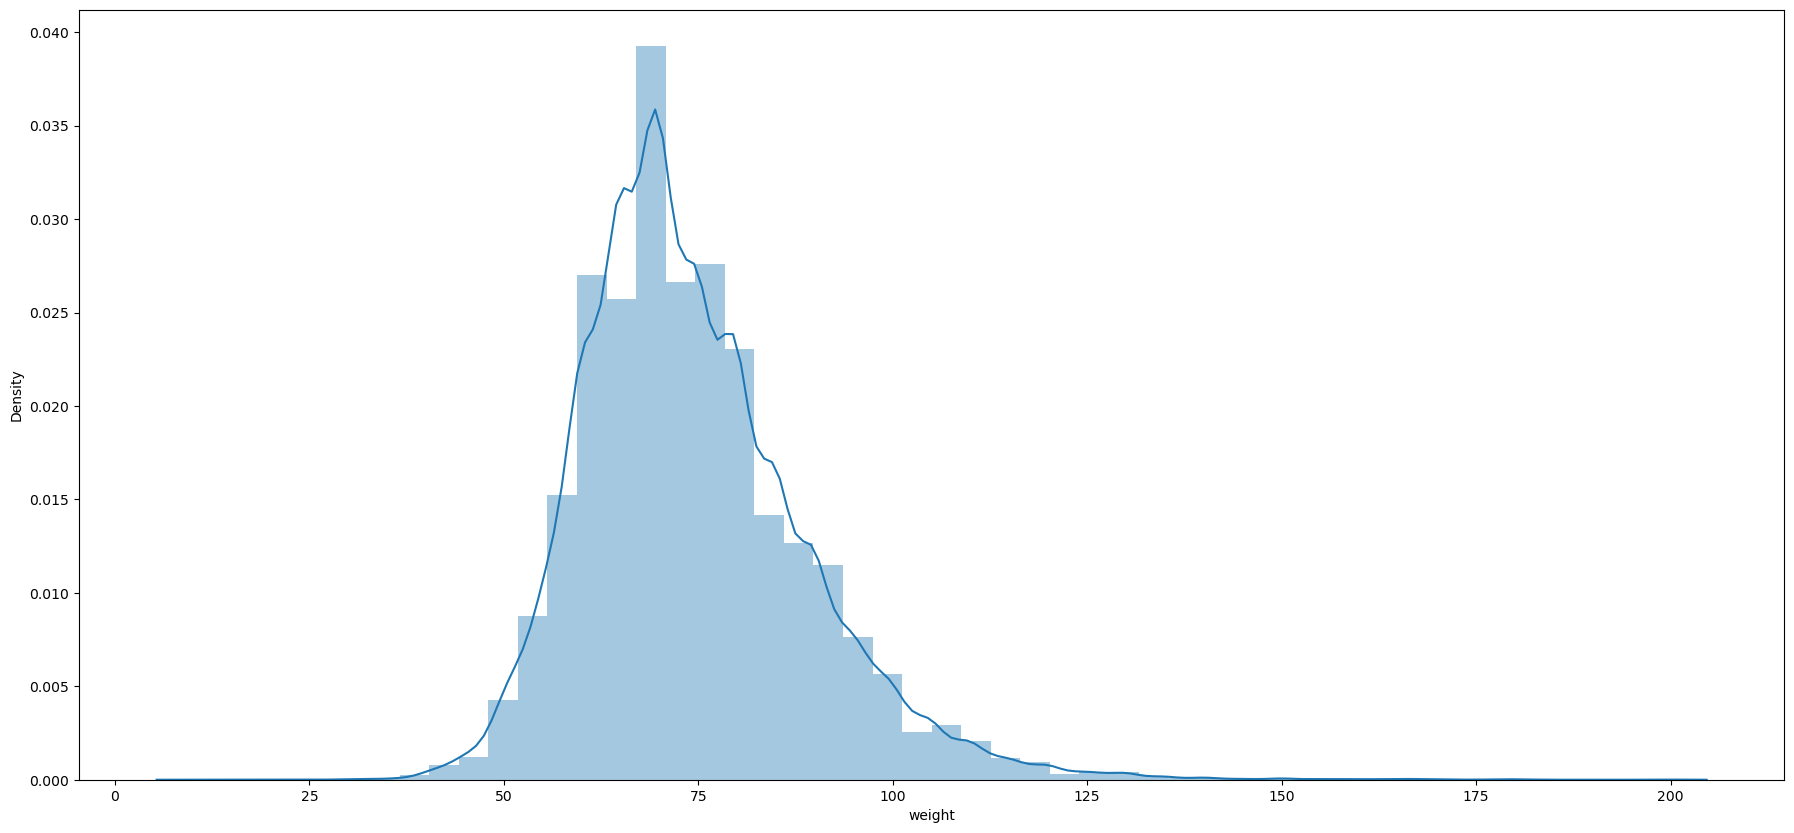

In [11]:
plt.figure(figsize=(22,10))
sns.distplot(data_encoded['weight'])

{'whiskers': [<matplotlib.lines.Line2D at 0x24957519110>,
 'caps': [<matplotlib.lines.Line2D at 0x24957482910>,
 'boxes': [<matplotlib.lines.Line2D at 0x249574834d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2495751bb90>],
 'fliers': [<matplotlib.lines.Line2D at 0x249568276d0>],
 'means': []}

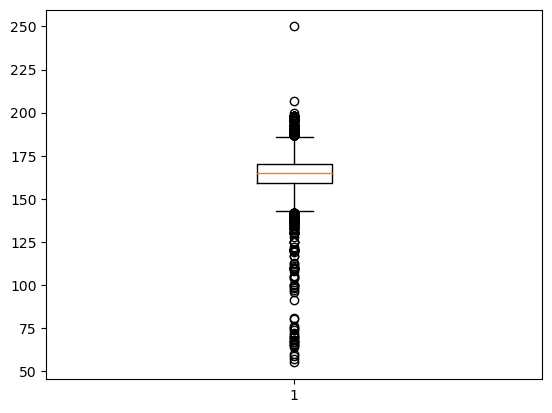

In [12]:
plt.boxplot(data_encoded['height'])

In [13]:
lower_percentile = data_encoded['height'].quantile(0.01)
upper_percentile = data_encoded['height'].quantile(0.99)

# Cap the outliers
data_encoded['height'] = data_encoded['height'].clip(lower=lower_percentile, upper=upper_percentile)

print(data_encoded)

       age  height  weight  ap_hi  ap_lo  smoke  alco  active  cardio  \
0       58     168    62.0    110     80      0     0       1       0   
1       73     156    85.0    140     90      0     0       1       1   
2       62     165    64.0    130     70      0     0       0       1   
3       52     169    82.0    150    100      0     0       1       1   
4       51     156    56.0    100     60      0     0       0       0   
...    ...     ...     ...    ...    ...    ...   ...     ...     ...   
69995   65     168    76.0    120     80      1     0       1       0   
69996   91     158   126.0    140     90      0     0       1       1   
69997   64     183   105.0    180     90      0     1       0       1   
69998   90     163    72.0    135     80      0     0       0       1   
69999   75     170    72.0    120     80      0     0       1       0   

       gender_2  cholesterol_2  cholesterol_3  gluc_2  gluc_3  
0             1              0              0       0      

{'whiskers': [<matplotlib.lines.Line2D at 0x249576c6950>,
 'caps': [<matplotlib.lines.Line2D at 0x249576d00d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24957694cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x249576d18d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x249576c7c50>],
 'means': []}

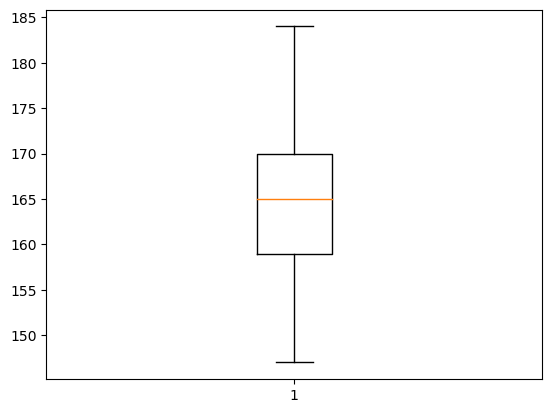

In [14]:
plt.boxplot(data_encoded['height'])

{'whiskers': [<matplotlib.lines.Line2D at 0x24957739d10>,
 'caps': [<matplotlib.lines.Line2D at 0x2495773b510>,
 'boxes': [<matplotlib.lines.Line2D at 0x24957738f90>],
 'medians': [<matplotlib.lines.Line2D at 0x249577449d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24957745390>],
 'means': []}

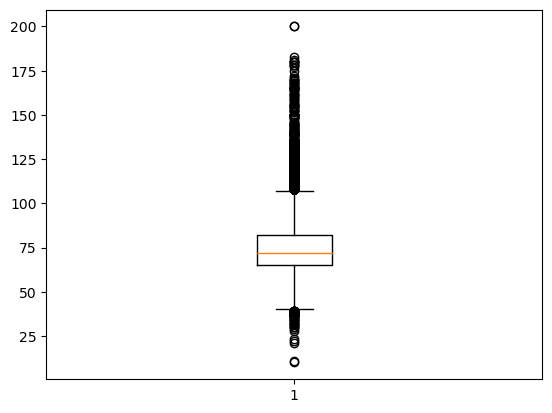

In [15]:
plt.boxplot(data_encoded['weight'])

In [16]:
lower_percentile = data_encoded['weight'].quantile(0.01)
upper_percentile = data_encoded['weight'].quantile(0.90)

# Cap the outliers
data_encoded['weight'] = data_encoded['weight'].clip(lower=lower_percentile, upper=upper_percentile)

print(data_encoded)

       age  height  weight  ap_hi  ap_lo  smoke  alco  active  cardio  \
0       58     168    62.0    110     80      0     0       1       0   
1       73     156    85.0    140     90      0     0       1       1   
2       62     165    64.0    130     70      0     0       0       1   
3       52     169    82.0    150    100      0     0       1       1   
4       51     156    56.0    100     60      0     0       0       0   
...    ...     ...     ...    ...    ...    ...   ...     ...     ...   
69995   65     168    76.0    120     80      1     0       1       0   
69996   91     158    93.0    140     90      0     0       1       1   
69997   64     183    93.0    180     90      0     1       0       1   
69998   90     163    72.0    135     80      0     0       0       1   
69999   75     170    72.0    120     80      0     0       1       0   

       gender_2  cholesterol_2  cholesterol_3  gluc_2  gluc_3  
0             1              0              0       0      

{'whiskers': [<matplotlib.lines.Line2D at 0x2495769ae90>,
 'caps': [<matplotlib.lines.Line2D at 0x24957579cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24957578450>],
 'medians': [<matplotlib.lines.Line2D at 0x2495757b150>],
 'fliers': [<matplotlib.lines.Line2D at 0x24957579050>],
 'means': []}

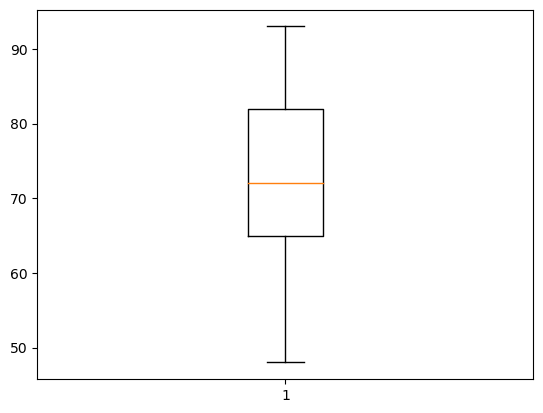

In [17]:
plt.boxplot(data_encoded['weight'])

{'whiskers': [<matplotlib.lines.Line2D at 0x249575d6390>,
 'caps': [<matplotlib.lines.Line2D at 0x249575d7c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x249575d59d0>],
 'medians': [<matplotlib.lines.Line2D at 0x249575e1210>],
 'fliers': [<matplotlib.lines.Line2D at 0x249575e1c90>],
 'means': []}

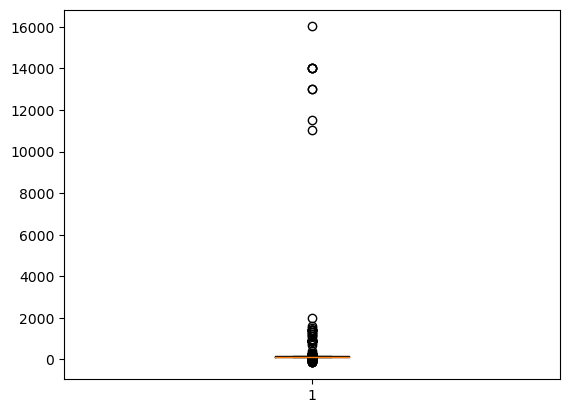

In [18]:
plt.boxplot(data_encoded['ap_hi'])

In [19]:
lower_percentile = data_encoded['ap_hi'].quantile(0.01)
upper_percentile = data_encoded['ap_hi'].quantile(0.90)

# Cap the outliers
data_encoded['ap_hi'] = data_encoded['ap_hi'].clip(lower=lower_percentile, upper=upper_percentile)

print(data_encoded)

       age  height  weight  ap_hi  ap_lo  smoke  alco  active  cardio  \
0       58     168    62.0    110     80      0     0       1       0   
1       73     156    85.0    140     90      0     0       1       1   
2       62     165    64.0    130     70      0     0       0       1   
3       52     169    82.0    150    100      0     0       1       1   
4       51     156    56.0    100     60      0     0       0       0   
...    ...     ...     ...    ...    ...    ...   ...     ...     ...   
69995   65     168    76.0    120     80      1     0       1       0   
69996   91     158    93.0    140     90      0     0       1       1   
69997   64     183    93.0    150     90      0     1       0       1   
69998   90     163    72.0    135     80      0     0       0       1   
69999   75     170    72.0    120     80      0     0       1       0   

       gender_2  cholesterol_2  cholesterol_3  gluc_2  gluc_3  
0             1              0              0       0      

{'whiskers': [<matplotlib.lines.Line2D at 0x2495764b590>,
 'caps': [<matplotlib.lines.Line2D at 0x24957601510>,
 'boxes': [<matplotlib.lines.Line2D at 0x2495764a910>],
 'medians': [<matplotlib.lines.Line2D at 0x249577920d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2495764b450>],
 'means': []}

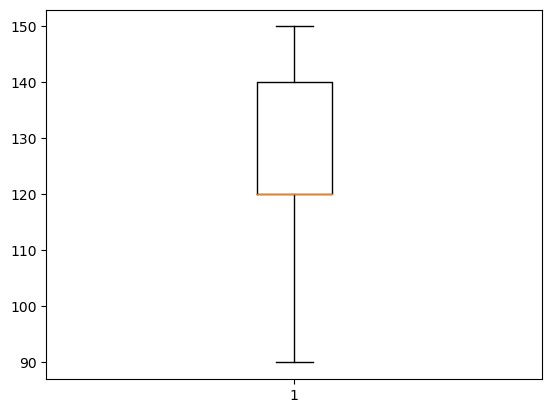

In [20]:
plt.boxplot(data_encoded['ap_hi'])

{'whiskers': [<matplotlib.lines.Line2D at 0x249577f8250>,
 'caps': [<matplotlib.lines.Line2D at 0x249577f9ad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x249577ef550>],
 'medians': [<matplotlib.lines.Line2D at 0x249577fb110>],
 'fliers': [<matplotlib.lines.Line2D at 0x249577fbc50>],
 'means': []}

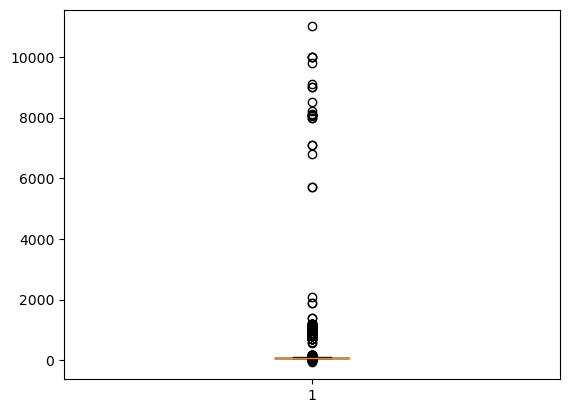

In [21]:
plt.boxplot(data_encoded['ap_lo'])

In [22]:
lower_percentile=data['ap_lo'].quantile(0.1)
upper_percentile=data['ap_lo'].quantile(0.90)

data_encoded['ap_lo']=data_encoded['ap_lo'].clip(lower=lower_percentile,upper=upper_percentile)
print(data_encoded)

       age  height  weight  ap_hi  ap_lo  smoke  alco  active  cardio  \
0       58     168    62.0    110     80      0     0       1       0   
1       73     156    85.0    140     90      0     0       1       1   
2       62     165    64.0    130     70      0     0       0       1   
3       52     169    82.0    150     90      0     0       1       1   
4       51     156    56.0    100     70      0     0       0       0   
...    ...     ...     ...    ...    ...    ...   ...     ...     ...   
69995   65     168    76.0    120     80      1     0       1       0   
69996   91     158    93.0    140     90      0     0       1       1   
69997   64     183    93.0    150     90      0     1       0       1   
69998   90     163    72.0    135     80      0     0       0       1   
69999   75     170    72.0    120     80      0     0       1       0   

       gender_2  cholesterol_2  cholesterol_3  gluc_2  gluc_3  
0             1              0              0       0      

{'whiskers': [<matplotlib.lines.Line2D at 0x24957857850>,
 'caps': [<matplotlib.lines.Line2D at 0x24957838c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x24957856b50>],
 'medians': [<matplotlib.lines.Line2D at 0x24957862550>],
 'fliers': [<matplotlib.lines.Line2D at 0x24957862f50>],
 'means': []}

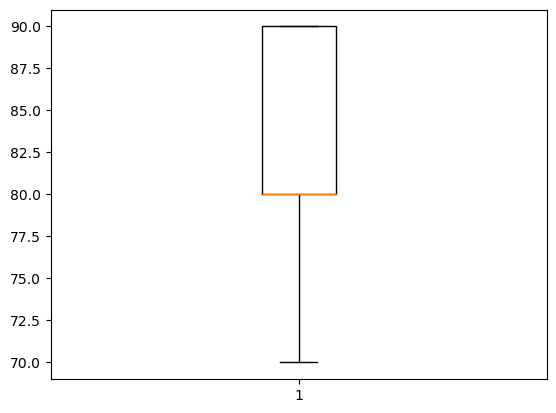

In [23]:
plt.boxplot(data_encoded['ap_lo'])

# Splitting of Data

In [24]:
X=data_encoded.drop(['cardio'],axis='columns')
Y=data_encoded.cardio

In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=100)

In [26]:
equation=LogisticRegression()

In [27]:
equation.fit(X_train,Y_train)

C:\Users\omkar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
Y_test_predicted=equation.predict(X_test)

In [29]:
confusion_matrix=confusion_matrix(Y_test,Y_test_predicted)
print(confusion_matrix)

[[10586  3347]
 [ 4551  9516]]


In [30]:
accuracy=accuracy_score(Y_test,Y_test_predicted)
print(accuracy)

0.7179285714285715


In [31]:
precision=precision_score(Y_test,Y_test_predicted)
print(precision)

0.7397963150120501


In [32]:
recall=recall_score(Y_test,Y_test_predicted)
print(recall)

0.6764768607378973


In [33]:
f1=f1_score(Y_test,Y_test_predicted)
print(f1)

0.7067211288525808
